In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json

import time # use for annotating the date of the API pull in graphics using '.now'

import openbrewerydb # a wrapper for accessing the Open Brewery DB API

import gmaps
import gmaps.datasets

import gmaps.geojson_geometries

from matplotlib.cm import viridis
from matplotlib.colors import to_hex

#config
from config import api_key

from pprint import pprint


#gmaps.configure(api_key=api_key)
# print(api_key) # comment out before saving or uploading to github

In [3]:
# Store filepath in a variable
file_one = "census_data.csv"

In [4]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
# Show just the header
file_one_df.head()

,Name,Population,Median Age,Household Income,Per Capita Income,Number of Males,Number of Females,state
0,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama
1,Alaska,720316,33.6,70760,32651,375798,344518,Alaska
2,Arizona,6479703,36.3,49774,25358,3221367,3258336,Arizona
3,Arkansas,2933369,37.5,40768,22170,1439862,1493507,Arkansas
4,California,37659181,35.4,61094,29527,18726468,18932713,California


In [5]:
brewery_data_df = openbrewerydb.load(state=None)
brewery_data_df.count() # there are approximately 8,000 breweries in the US as of 2019

brewery_type    8029
city            7924
country         8029
id              8029
latitude        4737
longitude       4737
name            8029
phone           8029
postal_code     7924
state           7924
street          8029
tag_list        8029
updated_at      8029
website_url     8029
dtype: int64

In [6]:
print(brewery_data_df.columns)

Index(['brewery_type', 'city', 'country', 'id', 'latitude', 'longitude',
       'name', 'phone', 'postal_code', 'state', 'street', 'tag_list',
       'updated_at', 'website_url'],
      dtype='object')


In [7]:
# Merge two dataframes using an inner join
merge_table = pd.merge(file_one_df, brewery_data_df, on="state")
merge_table.to_csv("Output/Joined_File_DB.csv", index=False, header=True)
merge_table

,Name,Population,Median Age,Household Income,Per Capita Income,Number of Males,Number of Females,state,brewery_type,city,...,id,latitude,longitude,name,phone,postal_code,street,tag_list,updated_at,website_url
0,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Birmingham,...,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222-1932,201 41st St S,[],2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Tuscaloosa,...,4,33.198491,-87.562155,Band of Brothers Brewing Company,2052665137,35401-4653,1605 23rd Ave,[],2018-08-23T23:19:59.462Z,http://www.bandofbrosbrewing.com
2,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Birmingham,...,44,33.512849,-86.791400,Trim Tab Brewing,2057030536,35233-3401,2721 5th Ave S,[],2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
3,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Huntsville,...,46,34.727752,-86.593201,Yellowhammer Brewery,2569755950,35805-3046,2600 Clinton Ave W,[],2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
4,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,planning,Spanish Fort,...,1,30.674913,-87.915272,5 Rivers Brewing LLC,2516897483,36527-3161,,[],2018-08-23T23:19:56.771Z,http://5riversbrewing.com
5,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Gadsden,...,3,34.016888,-86.005006,Back Forty Beer Co,2564674912,35901-3361,200 N 6th St,[],2018-08-23T23:19:58.654Z,http://www.backfortybeer.com
6,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,brewpub,Huntsville,...,5,34.732724,-86.585839,Below the Radar Brewing Co,2564696617,35801-4837,220 Holmes Ave NE,[],2018-08-23T23:20:00.300Z,http://www.btrbrew.com
7,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Gulf Shores,...,6,30.278051,-87.683039,Big Beach Brewing Company,2519482337,36542-3104,300 E 24th Ave,[],2018-08-23T23:20:01.170Z,http://www.bigbeachbrewing.com
8,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Madison,...,9,NaN,NaN,Blue Pants Brewery,2566796330,35758-8675,"500 Lanier Rd, Bld 1 - Ste A",[],2018-08-11T21:35:43.498Z,http://www.bluepantsbrew.com
9,Alabama,4799277,38.1,43253,23680,2328592,2470685,Alabama,micro,Birmingham,...,13,NaN,NaN,Cahaba Brewing Co,2059669444,35222-2911,4500 5th Ave S Ste C,[],2018-08-11T21:35:43.648Z,http://www.cahababrewing.com


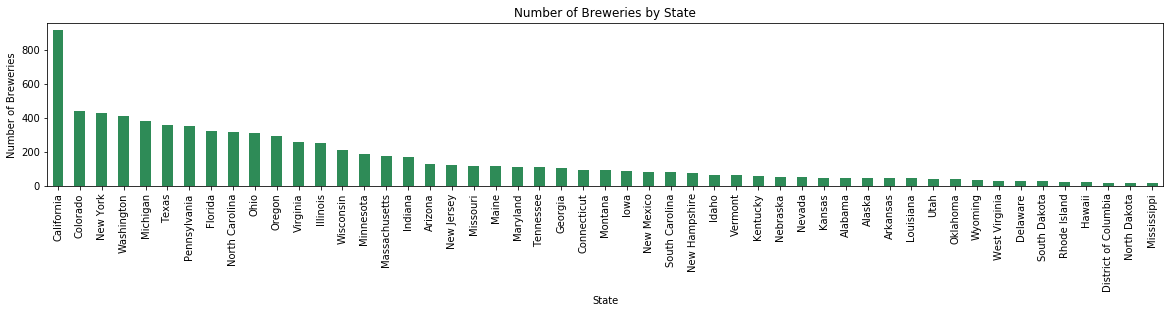

<Figure size 432x288 with 0 Axes>

In [8]:
states = merge_table["state"]
number_breweries = merge_table["state"].value_counts()

# Configure plot and ticks
plt.figure(figsize=(20,3))
number_breweries.plot(kind="bar", facecolor="seagreen")

# Set textual properties
plt.title("Number of Breweries by State")
plt.ylabel("Number of Breweries")
plt.xlabel("State")

# Show plot

plt.savefig("Output/breweries_by_state_db.png")

plt.show()
plt.tight_layout()

In [9]:
number_breweries = merge_table["state"].value_counts()
grouped = merge_table.groupby("state")
median_age = grouped["Median Age"].mean()

median_age = pd.DataFrame({"Number of Breweries": number_breweries,
                       "Median Age": median_age
                      })

median_age.to_csv("Output/median_age_db.csv", index=False, header=True)

median_age

,Number of Breweries,Median Age
Alabama,46,38.1
Alaska,45,33.6
Arizona,126,36.3
Arkansas,45,37.5
California,915,35.4
Colorado,439,36.1
Connecticut,94,40.2
Delaware,29,38.9
District of Columbia,17,33.8
Florida,321,41.0


In [10]:
number_breweries = merge_table["state"].value_counts()
grouped = merge_table.groupby("state")
population = grouped["Population"].mean()

population = pd.DataFrame({"Number of Breweries": number_breweries,
                       "Population": population
                      })

population.to_csv("Output/population_db.csv", index=False, header=True)

population

,Number of Breweries,Population
Alabama,46,4799277
Alaska,45,720316
Arizona,126,6479703
Arkansas,45,2933369
California,915,37659181
Colorado,439,5119329
Connecticut,94,3583561
Delaware,29,908446
District of Columbia,17,619371
Florida,321,19091156


In [11]:
number_breweries = merge_table["state"].value_counts()
grouped = merge_table.groupby("state")
income = grouped["Household Income"].mean()

income = pd.DataFrame({"Number of Breweries": number_breweries,
                       "Household Income": income
                      })

income.to_csv("Output/income_db.csv", index=False, header=True)

income

,Number of Breweries,Household Income
Alabama,46,43253
Alaska,45,70760
Arizona,126,49774
Arkansas,45,40768
California,915,61094
Colorado,439,58433
Connecticut,94,69461
Delaware,29,59878
District of Columbia,17,65830
Florida,321,46956
